# Support Vector Machines (SVM)
# HW 4

### Set up

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt



### utility functions

In [2]:
def plot_class_regions_for_classifier_subplot(clf, X, y, X_test, y_test, title, subplot, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)

    if plot_decision_regions:
        subplot.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    subplot.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    subplot.set_xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    subplot.set_ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        subplot.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    subplot.set_title(title)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        subplot.legend(loc=0, handles=legend_handles)


def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

### Synthetic dataset 

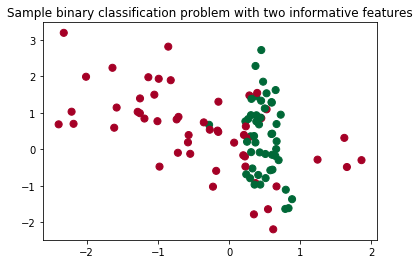

In [17]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# synthetic dataset for classification (binary) 
plt.figure()
plt.title('Sample binary classification problem with two informative features')

X, y = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y, marker= 'o', s=50, cmap=plt.cm.RdYlGn)
plt.show()

### Linear Support Vector Machine

              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.64      0.90      0.75        10

    accuracy                           0.76        25
   macro avg       0.78      0.78      0.76        25
weighted avg       0.80      0.76      0.76        25



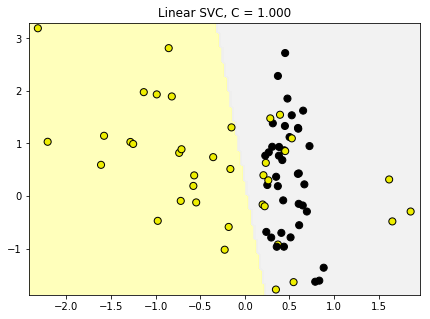

In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = SVC(kernel = 'linear', C=1.0).fit(X_train, y_train)

y_pred = clf.predict(X_test)

result_metrics = classification_report(y_test, y_pred)
print(result_metrics)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))

title = 'Linear SVC, C = {:.3f}'.format(1.0)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subaxes)

### Linear Support Vector Machine: C parameter

- C is regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.64      0.90      0.75        10

    accuracy                           0.76        25
   macro avg       0.78      0.78      0.76        25
weighted avg       0.80      0.76      0.76        25

              precision    recall  f1-score   support

           0       0.92      0.73      0.81        15
           1       0.69      0.90      0.78        10

    accuracy                           0.80        25
   macro avg       0.80      0.82      0.80        25
weighted avg       0.83      0.80      0.80        25



C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


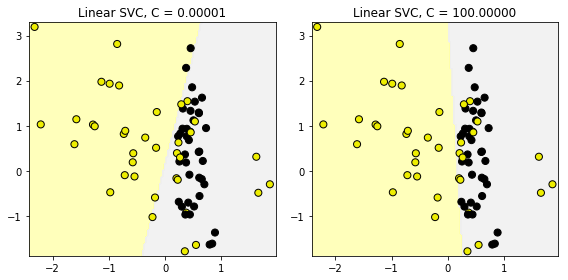

In [5]:
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
this_C = 1.0

fig, subaxes = plt.subplots(1, 2, figsize=(8, 4))

for this_C, subplot in zip([0.00001, 100], subaxes):
    clf = LinearSVC(C=this_C, max_iter=1000).fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    result_metrics = classification_report(y_test, y_pred)
    print(result_metrics)
    
    title = 'Linear SVC, C = {:.5f}'.format(this_C)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
plt.tight_layout()

### Kernelized Support Vector Machines

- More complex synthetic dataset

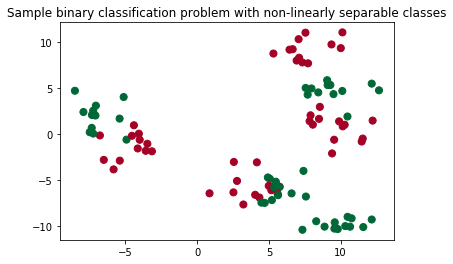

In [18]:
# more difficult synthetic dataset for classification (binary) 
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2

plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=plt.cm.RdYlGn)
plt.show()

### Classification using kernels

#### RBF kernel (Gaussian kernel)
#### Polynomial kernel

RBF kernel (Gaussian) results
               precision    recall  f1-score   support

           0       0.62      1.00      0.76        13
           1       1.00      0.33      0.50        12

    accuracy                           0.68        25
   macro avg       0.81      0.67      0.63        25
weighted avg       0.80      0.68      0.64        25

Polynomial kernel results
               precision    recall  f1-score   support

           0       0.63      0.92      0.75        13
           1       0.83      0.42      0.56        12

    accuracy                           0.68        25
   macro avg       0.73      0.67      0.65        25
weighted avg       0.73      0.68      0.66        25



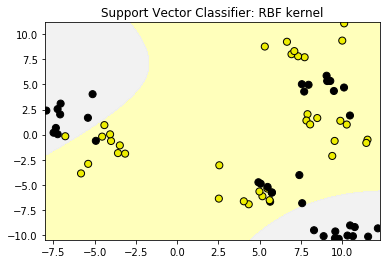

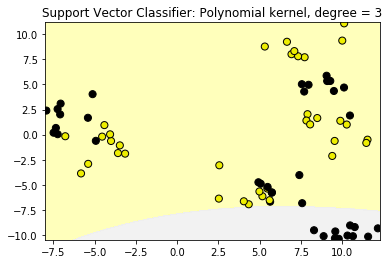

In [10]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

clf1 = SVC(max_iter=10000).fit(X_train, y_train)
y_pred = clf1.predict(X_test)

result_metrics = classification_report(y_test, y_pred)
print('RBF kernel (Gaussian) results\n', result_metrics)


clf2 = SVC(kernel='poly', max_iter=10000).fit(X_train, y_train)
y_pred = clf2.predict(X_test)

result_metrics = classification_report(y_test, y_pred)
print('Polynomial kernel results\n', result_metrics)

# The default SVC kernel is radial basis function (RBF)
plot_class_regions_for_classifier(SVC().fit(X_train, y_train),
                                 X_train, y_train, None, None,
                                 'Support Vector Classifier: RBF kernel')

# Compare decision boundries with polynomial kernel, degree = 3
plot_class_regions_for_classifier(SVC(kernel = 'poly', degree = 3)
                                 .fit(X_train, y_train), X_train,
                                 y_train, None, None,
                                 'Support Vector Classifier: Polynomial kernel, degree = 3')

### Support Vector Machine with RBF kernel: gamma parameter

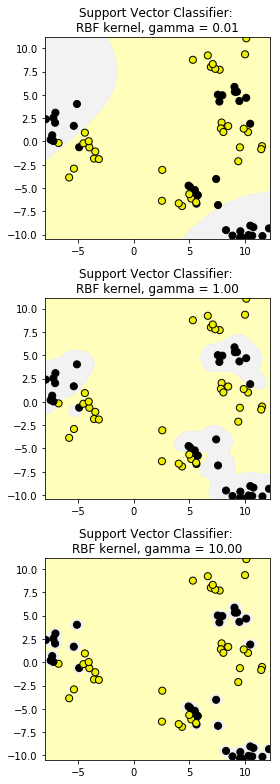

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 1, figsize=(4, 11))

for this_gamma, subplot in zip([0.01, 1.0, 10.0], subaxes):
    clf = SVC(kernel = 'rbf', gamma=this_gamma).fit(X_train, y_train)
    
    title = 'Support Vector Classifier: \nRBF kernel, gamma = {:.2f}'.format(this_gamma)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
    plt.tight_layout()

### Support Vector Machine with RBF kernel: using both C and gamma parameter

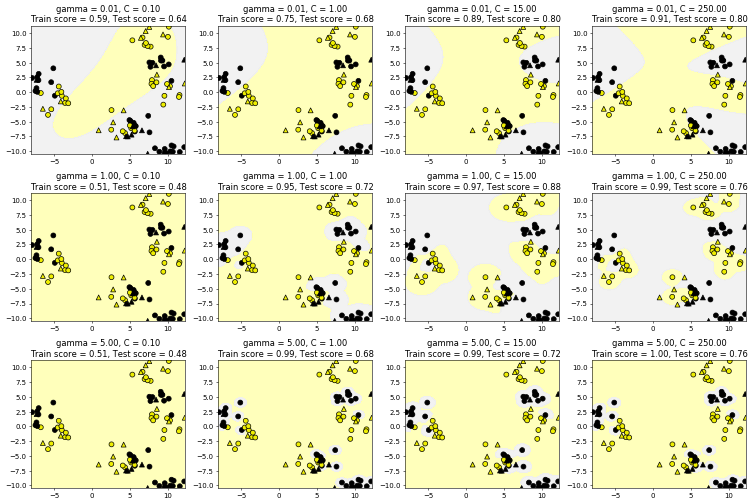

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 4, figsize=(15, 10), dpi=50)

for this_gamma, this_axis in zip([0.01, 1, 5], subaxes):
    
    for this_C, subplot in zip([0.1, 1, 15, 250], this_axis):
        title = 'gamma = {:.2f}, C = {:.2f}'.format(this_gamma, this_C)
        clf = SVC(kernel = 'rbf', gamma = this_gamma,
                 C = this_C).fit(X_train, y_train)
        plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                                 X_test, y_test, title,
                                                 subplot)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

# HW 4 ============================
Part 1:

# List your team's number and team's members

# Breast cancer dataset for classification

Apply SVM linear kernel (basically no kernel) and print the performance metrics.

Apply SVM RBF kernel (Gaussian kernel) and print the performance metrics with non-normalized dataset.

Apply SVM RBF kernel with normalized dataset.

Apply SVM RBF kernel using varying C and gamma parameter values. Use C= 0.1, 1, 15, 250.  Use gamma= 0.01, 1, 5.  Hence, 12 subplots,  similar to the above example, should be drawn. 

Part 2:

Write a short comparisons of SVM linear kernel and RBF kernel.

Write a short summary of how C and gamma parameters play in SVM RBF kernel.



# download breast cancer dataset

In [6]:
from sklearn.datasets import load_breast_cancer

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)